In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
customer_ID          665249 non-null int64
shopping_pt          665249 non-null int64
record_type          665249 non-null int64
day                  665249 non-null int64
time                 665249 non-null object
state                665249 non-null object
location             665249 non-null int64
group_size           665249 non-null int64
homeowner            665249 non-null int64
car_age              665249 non-null int64
car_value            663718 non-null object
risk_factor          424831 non-null float64
age_oldest           665249 non-null int64
age_youngest         665249 non-null int64
married_couple       665249 non-null int64
C_previous           646538 non-null float64
duration_previous    646538 non-null float64
A                    665249 non-null int64
B                    665249 non-null int64
C                    665249 non-null int64
D                   

In [5]:
data.shape

(665249, 25)

In [6]:
#summary statistics
data.describe()

,customer_ID,shopping_pt,record_type,day,location,group_size,homeowner,car_age,risk_factor,age_oldest,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
count,6.652490e+05,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,424831.000000,665249.000000,...,646538.000000,646538.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000
mean,1.007655e+07,4.219966,0.145824,1.969429,12271.543022,1.234784,0.536229,8.139437,2.563996,44.992403,...,2.444718,6.003774,0.927546,0.454236,2.275265,2.454299,0.445193,1.162768,2.275120,635.785008
std,4.404978e+04,2.394369,0.352930,1.453470,1564.789415,0.461036,0.498686,5.764598,1.111584,17.403440,...,1.034596,4.680793,0.595221,0.497902,0.990798,0.753953,0.496987,0.943594,0.909567,45.993758
min,1.000000e+07,1.000000,0.000000,0.000000,10001.000000,1.000000,0.000000,0.000000,1.000000,18.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,260.000000
25%,1.003852e+07,2.000000,0.000000,1.000000,10936.000000,1.000000,0.000000,3.000000,2.000000,28.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,605.000000
50%,1.007640e+07,4.000000,0.000000,2.000000,12027.000000,1.000000,1.000000,7.000000,3.000000,44.000000,...,3.000000,5.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000,2.000000,635.000000
75%,1.011470e+07,6.000000,0.000000,3.000000,13426.000000,1.000000,1.000000,12.000000,4.000000,60.000000,...,3.000000,9.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,3.000000,665.000000
max,1.015272e+07,13.000000,1.000000,6.000000,16580.000000,4.000000,1.000000,85.000000,4.000000,75.000000,...,4.000000,15.000000,2.000000,1.000000,4.000000,3.000000,1.000000,3.000000,4.000000,922.000000


In [7]:
data_sort=data.sort_values(by='cost', ascending=False).head()
data_sort.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
92328,10021385,2,0,2,12:09,NY,12688,1,0,4,...,NaN,NaN,2,0,2,2,1,0,2,922
278294,10064168,4,0,0,13:22,NY,14860,1,0,2,...,NaN,NaN,2,1,3,1,1,0,2,917
394371,10090695,7,0,0,16:30,PA,10497,1,1,0,...,NaN,NaN,2,0,4,3,1,1,2,912
394372,10090695,8,0,0,16:31,PA,10497,1,1,0,...,NaN,NaN,2,0,4,3,1,1,2,912
394370,10090695,6,0,0,16:27,PA,10497,1,1,0,...,NaN,NaN,2,0,4,3,1,1,2,912


In [8]:
data.columns= data.columns.str.replace(' ','')

In [9]:
#Function to get the min and max value easily by just passing the parameter
def min_max_values(col):
    top=data[col].idxmax()
    top_obs=pd.DataFrame(data.loc[top])
    
    bottom=data[col].idxmin()
    bot_obs=pd.DataFrame(data.loc[bottom])
    
    min_max_obs=pd.concat([top_obs,bot_obs], axis=1)
    
    return min_max_obs

In [10]:
min_max_values('cost')

,92328,348753
customer_ID,10021385,10080195
shopping_pt,2,2
record_type,0,0
day,2,2
time,12:09,14:20
state,NY,OH
location,12688,13946
group_size,1,1
homeowner,0,0
car_age,4,18


Result interpretation is at 92328 we have the max value and at 348753 we have the minimum value

(array([2.20000e+01, 8.40000e+01, 5.10000e+01, 7.70000e+01, 6.50000e+01,
        5.60000e+01, 2.11000e+02, 3.36900e+03, 2.06320e+04, 7.94420e+04,
        1.69435e+05, 1.86835e+05, 1.29498e+05, 5.44700e+04, 1.59640e+04,
        3.92700e+03, 8.11000e+02, 2.46000e+02, 3.80000e+01, 1.60000e+01]),
 array([260. , 293.1, 326.2, 359.3, 392.4, 425.5, 458.6, 491.7, 524.8,
        557.9, 591. , 624.1, 657.2, 690.3, 723.4, 756.5, 789.6, 822.7,
        855.8, 888.9, 922. ]),
 <a list of 20 Patch objects>)

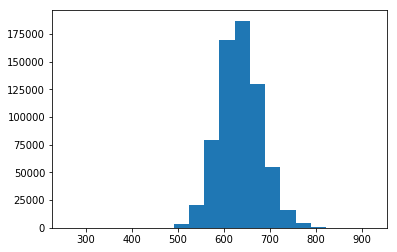

In [11]:
#histogram of continuous numerical value
num_blans=20
plt.hist(data['cost'],num_blans)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


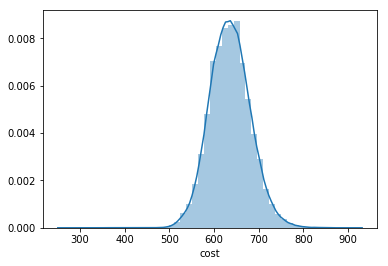

In [12]:
sns.distplot(data['cost'])

In [13]:
state_list = data['state'].unique()
state_list

array(['IN', 'NY', 'PA', 'WV', 'MO', 'OH', 'OK', 'FL', 'OR', 'WA', 'KS',
       'NV', 'ID', 'CO', 'CT', 'AL', 'AR', 'NM', 'MS', 'MD', 'RI', 'UT',
       'ME', 'TN', 'WI', 'MT', 'KY', 'WY', 'NE', 'ND', 'DE', 'GA', 'NH',
       'IA', 'DC', 'SD'], dtype=object)

In [14]:
make_dist=data.groupby(['state']).get_group('IN')
make_dist['customer_ID'].shape[0]

25295

In [15]:
make_dist

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
5,10000000,6,0,0,11:57,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
6,10000000,7,0,0,11:58,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
7,10000000,8,0,0,12:03,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
8,10000000,9,1,0,12:07,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,634
69,10000027,1,0,0,09:11,IN,10029,1,0,17,...,2.0,1.0,0,0,1,1,0,0,2,575


In [16]:
num_cust_id = []
for i in state_list:
    make_dist=data.groupby(['state']).get_group(i)
    num_cust_id.append(make_dist['customer_ID'].shape[0])


In [17]:
num_cust_id 

[25295,
 91627,
 60677,
 5053,
 15243,
 44537,
 13779,
 106287,
 15068,
 25188,
 5585,
 15459,
 6110,
 24409,
 19353,
 23560,
 10460,
 6790,
 10722,
 28443,
 5887,
 14820,
 6800,
 18099,
 10103,
 3332,
 16100,
 1163,
 3121,
 2487,
 4101,
 8802,
 7988,
 4545,
 3748,
 508]

In [18]:
state_cust=pd.DataFrame({
    'states':state_list,
    'customer_id':num_cust_id
})

In [19]:
state_cust.head()

,states,customer_id
0,IN,25295
1,NY,91627
2,PA,60677
3,WV,5053
4,MO,15243


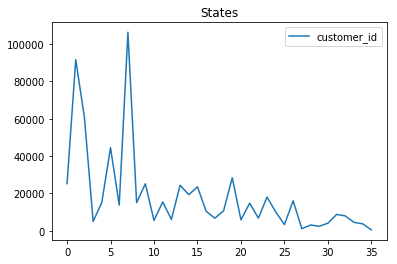

In [20]:
state_cust.plot(title='States')

In [21]:
data_num=data.select_dtypes(include=['float64'])
data_num.head()

,risk_factor,C_previous,duration_previous
0,3.0,1.0,2.0
1,3.0,1.0,2.0
2,3.0,1.0,2.0
3,3.0,1.0,2.0
4,3.0,1.0,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B83935748>,
      dtype=object)

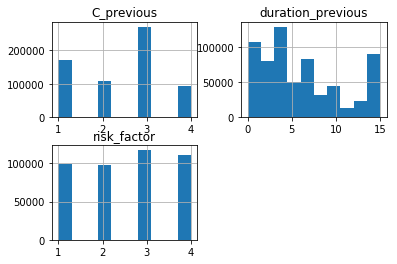

In [22]:
data_num.hist(bins=10)

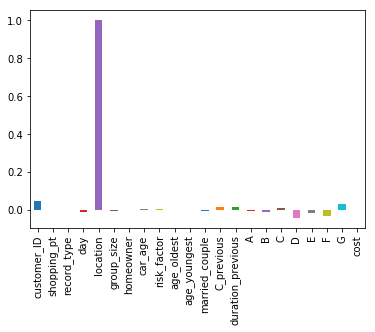

In [23]:
data.corr()['location'].plot.bar()

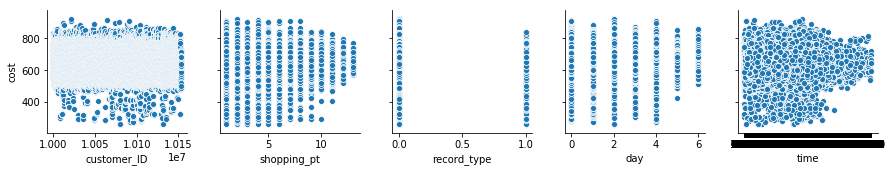

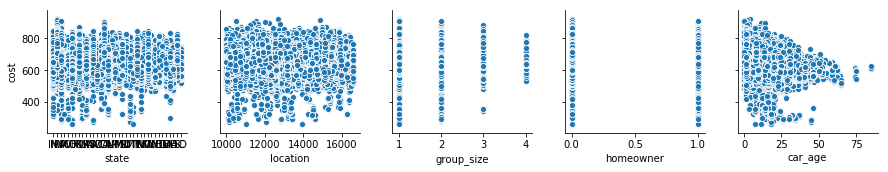

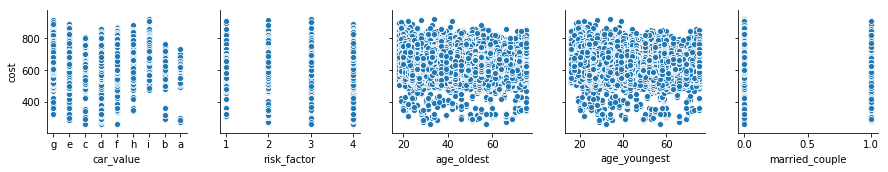

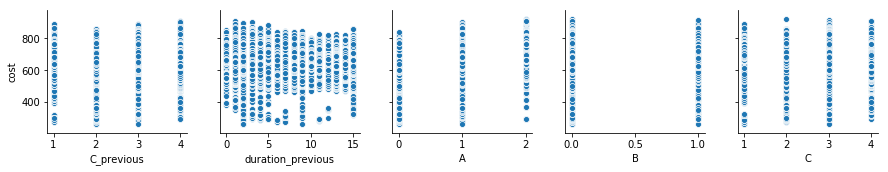

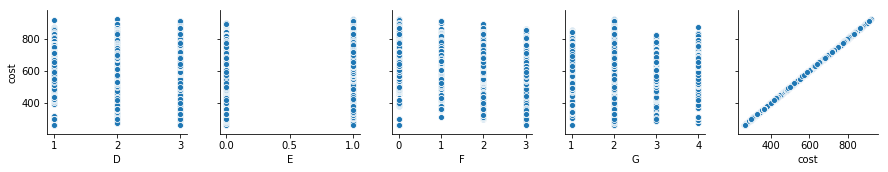

In [24]:
for i in range(0,len(data.columns),5):
    sns.pairplot(data,y_vars='cost',x_vars=data.columns[i:i+5])

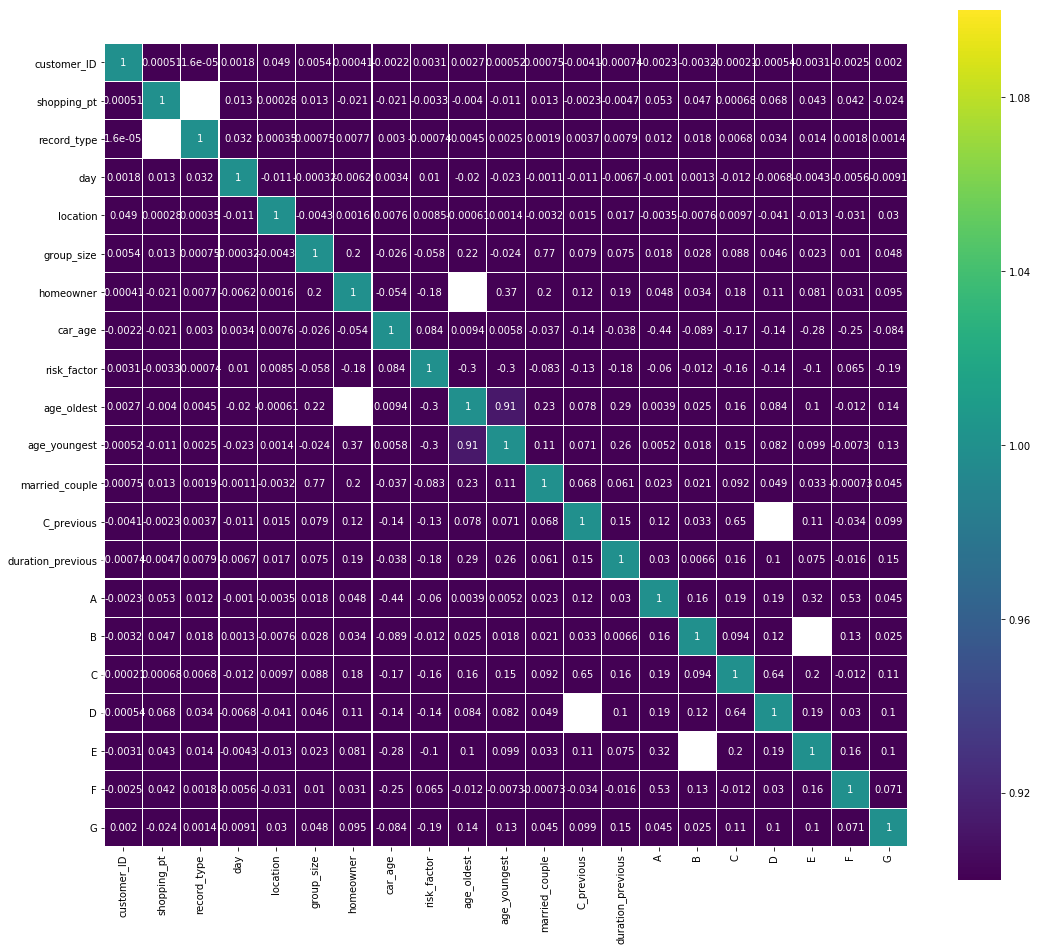

In [25]:
corr=data.drop('cost', axis=1).corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr[(corr >= 0.5) | (corr <= 0.4)],
           cmap='viridis', vmax=1.0, vmin=1.0, linewidths=0.1,
           annot= True,  square=True);

In [26]:
data1 = data.filter(['customer_ID','cost','state','car_age'], axis = 1)

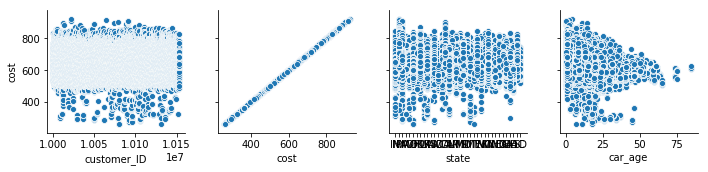

In [27]:
for i in range(0,len(data1.columns),5):
    sns.pairplot(data1,y_vars='cost',x_vars=data1.columns[i:i+5])

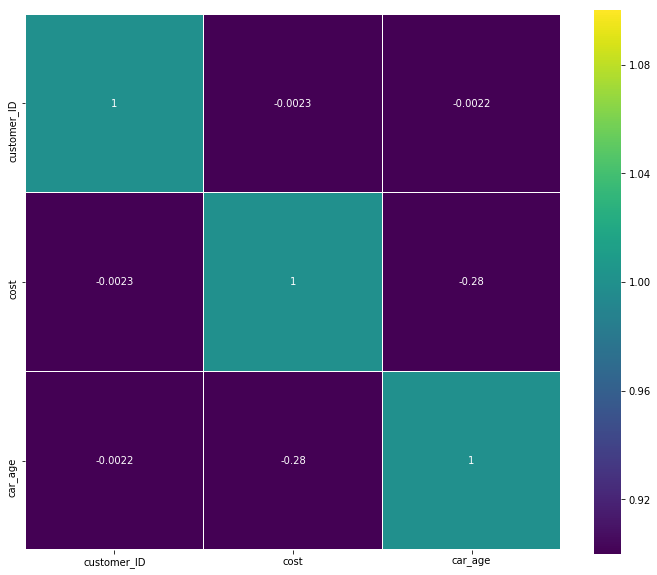

In [33]:
corr=data1.drop('state', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= 0.4)],
           cmap='viridis', vmax=1.0, vmin=1.0, linewidths=0.1,
           annot= True,  square=True);